# Following the loading CESM LENS data worksheet

In [1]:
import intake
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import intake_esm
#url = intake_esm.tutorial.get_url('google_cmip6')
#print(url)
# If you want CESM LENS1:
url ="https://raw.githubusercontent.com/NCAR/cesm-lens-aws/main/intake-catalogs/aws-cesm1-le.json"

In [3]:
cat = intake.open_esm_datastore(url)
cat

,unique
variable,78
long_name,75
component,5
experiment,4
frequency,6
vertical_levels,3
spatial_domain,5
units,25
start_time,12
end_time,13


In [4]:
unique = cat.unique()
unique

variable            [FLNS, FLNSC, FLUT, FSNS, FSNSC, FSNTOA, ICEFR...
long_name           [net longwave flux at surface, clearsky net lo...
component                             [atm, ice_nh, ice_sh, lnd, ocn]
experiment                                   [20C, CTRL, HIST, RCP85]
frequency           [daily, hourly6-1990-2005, hourly6-2026-2035, ...
vertical_levels                                     [1.0, 30.0, 60.0]
spatial_domain      [global, artic_ocean, antarctica, global_land,...
units               [W/m2, fraction, m/s, Pa, kg/kg, kg/m2, K, m, ...
start_time          [1920-01-01 12:00:00, 0402-01-01 12:00:00, 185...
end_time            [2005-12-31 12:00:00, 2200-12-31 12:00:00, 191...
path                [s3://ncar-cesm-lens/atm/daily/cesmLE-20C-FLNS...
derived_variable                                                   []
dtype: object

In [5]:
# Let's look at the different variables that are available:

# unique['variable']

In [6]:
# If you don't know the shorthand for the variable you're interested in, we can look 
# at the "long_name" instead, which is a more descriptive version of the variable name:

# unique['long_name']

In [7]:
cat_subset2 = cat.search(
    experiment=["CTRL","20C","HIST", "RCP85"],
    long_name="reference height temperature",
)

cat_subset2

,unique
variable,1
long_name,1
component,1
experiment,4
frequency,5
vertical_levels,1
spatial_domain,1
units,1
start_time,11
end_time,11


In [8]:
cat_subset2.df

,variable,long_name,component,experiment,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,TREFHT,reference height temperature,atm,20C,daily,1.0,global,K,1920-01-01 12:00:00,2005-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-TREFH...
1,TREFHT,reference height temperature,atm,CTRL,daily,1.0,global,K,0402-01-01 12:00:00,2200-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-CTRL-TREF...
2,TREFHT,reference height temperature,atm,HIST,daily,1.0,global,K,1850-01-01 12:00:00,1919-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-HIST-TREF...
3,TREFHT,reference height temperature,atm,RCP85,daily,1.0,global,K,2006-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-RCP85-TRE...
4,TREFHT,reference height temperature,atm,20C,hourly6-1990-2005,1.0,global,K,1990-01-01 00:00:00,2006-01-01 00:00:00,s3://ncar-cesm-lens/atm/hourly6-1990-2005/cesm...
5,TREFHT,reference height temperature,atm,RCP85,hourly6-2026-2035,1.0,global,K,2026-01-01 00:00:00,2036-01-01 00:00:00,s3://ncar-cesm-lens/atm/hourly6-2026-2035/cesm...
6,TREFHT,reference height temperature,atm,RCP85,hourly6-2071-2080,1.0,global,K,2071-01-01 00:00:00,2081-01-01 00:00:00,s3://ncar-cesm-lens/atm/hourly6-2071-2080/cesm...
7,TREFHT,reference height temperature,atm,20C,monthly,1.0,global,K,1920-01-16 12:00:00,2005-12-16 12:00:00,s3://ncar-cesm-lens/atm/monthly/cesmLE-20C-TRE...
8,TREFHT,reference height temperature,atm,CTRL,monthly,1.0,global,K,0400-01-16 12:00:00,2200-12-16 12:00:00,s3://ncar-cesm-lens/atm/monthly/cesmLE-CTRL-TR...
9,TREFHT,reference height temperature,atm,HIST,monthly,1.0,global,K,1850-01-16 12:00:00,1919-12-16 12:00:00,s3://ncar-cesm-lens/atm/monthly/cesmLE-HIST-TR...


In [9]:
cat.esmcat.aggregation_control

AggregationControl(variable_column_name='variable', groupby_attrs=['component', 'experiment', 'frequency'], aggregations=[Aggregation(type=<AggregationType.union: 'union'>, attribute_name='variable', options={'compat': 'override'})])

In [10]:
# For loading CESM LENS1:
dset_dict = cat_subset2.to_dataset_dict(zarr_kwargs={"consolidated": True}, storage_options={"anon": True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'


/var/folders/_5/45bbgftd3qd6_2w3g4v2f7nr0000gn/T/ipykernel_15520/3847870928.py:2: DeprecationWarning: cdf_kwargs and zarr_kwargs are deprecated and will be removed in a future version. Please use xarray_open_kwargs instead.
  dset_dict = cat_subset2.to_dataset_dict(zarr_kwargs={"consolidated": True}, storage_options={"anon": True})


In [11]:
[key for key in dset_dict.keys()][:10]

['atm.HIST.monthly',
 'atm.20C.monthly',
 'atm.RCP85.hourly6-2026-2035',
 'atm.20C.daily',
 'atm.HIST.daily',
 'atm.20C.hourly6-1990-2005',
 'atm.RCP85.daily',
 'atm.RCP85.monthly',
 'atm.RCP85.hourly6-2071-2080',
 'atm.CTRL.monthly']

In [12]:
ds = dset_dict["atm.20C.monthly"]
ds

<xarray.Dataset>
Dimensions:    (member_id: 40, time: 1032, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time       (time) object 1920-01-16 12:00:00 ... 2005-12-16 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TREFHT     (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 576, 192, 288), meta=np.ndarray>
Attributes: (12/25)
    Conventions:                       CF-1.0
    NCO:                               4.3.4
    Version:                           $Name$
    important_note:                    This data is part of the project 'Blin...
    initial_file:                      b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i....
    logname:                           mudryk
    ...                                ...
    intake_esm_attrs:units:            K
    intake_esm_attrs:start_time:       1920-01-16 12:00:00
    intake_esm_attrs:end_time:         2005-12-16 12:00:00
    intake_esm_attrs:path:             s3://ncar-cesm-lens/atm/monthly/cesmLE...
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            atm.20C.monthly

In [13]:
ds2 = dset_dict["atm.RCP85.monthly"]
ds2

<xarray.Dataset>
Dimensions:    (member_id: 40, time: 1140, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time       (time) object 2006-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1140, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TREFHT     (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 576, 192, 288), meta=np.ndarray>
Attributes: (12/26)
    Conventions:                       CF-1.0
    NCO:                               4.3.4
    Version:                           $Name$
    host:                              tcs-f02n07
    important_note:                    This data is part of the project 'Blin...
    initial_file:                      b.e11.B20TRC5CNBDRD.f09_g16.105.cam.i....
    ...                                ...
    intake_esm_attrs:units:            K
    intake_esm_attrs:start_time:       2006-01-16 12:00:00
    intake_esm_attrs:end_time:         2100-12-16 12:00:00
    intake_esm_attrs:path:             s3://ncar-cesm-lens/atm/monthly/cesmLE...
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            atm.RCP85.monthly

In [14]:
# ds.TREFHT.isel(time=0, member_id=range(1, 40, 4)).plot(col="member_id", col_wrap=3, robust=True)

In [15]:
# Let's look at how reference height temperature has changed over time in different ensemble member, 
# for a grid box close to Vancouer 

# for iens in range(1,40,4): # only selecting every 4th ensemble member so the plot isn't too messy. 
#     ds.TREFHT.sel(lat = 50, lon=237, method = 'nearest').isel(member_id=iens).plot()
    
# # Plot the ensemble mean on top
# ds.TREFHT.sel(lat = 50, lon=237, method = 'nearest').mean(dim='member_id').plot(color='k')

In [16]:
annualmean = ds.TREFHT.groupby('time.year').mean(dim='time')
print(annualmean)

ensemblemean = annualmean.mean(dim='member_id')

#annualmean.isel(member_id=0).sel(lat=49,lon=230,method='nearest').plot()

ensemblemean

<xarray.DataArray 'TREFHT' (member_id: 40, year: 86, lat: 192, lon: 288)>
dask.array<transpose, shape=(40, 86, 192, 288), dtype=float32, chunksize=(1, 1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * year       (year) int64 1920 1921 1922 1923 1924 ... 2002 2003 2004 2005
Attributes:
    cell_methods:  time: mean
    long_name:     Reference height temperature
    units:         K


<xarray.DataArray 'TREFHT' (year: 86, lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(86, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * year     (year) int64 1920 1921 1922 1923 1924 ... 2001 2002 2003 2004 2005

In [17]:
# average annual mean in Vancouver for all 40 ensemble members

# ensemblemean.sel(lat=49,lon=237,method='nearest').plot()

In [18]:
# annual mean of TREFHT from RCP85 experiment to concat onto 20C data for 2006 onwards

annualmean_rcp85 = ds2.TREFHT.groupby('time.year').mean(dim='time')
print(annualmean_rcp85)

ensemblemean_rcp85 = annualmean_rcp85.mean(dim='member_id')

#annualmean.isel(member_id=0).sel(lat=49,lon=230,method='nearest').plot()

<xarray.DataArray 'TREFHT' (member_id: 40, year: 95, lat: 192, lon: 288)>
dask.array<transpose, shape=(40, 95, 192, 288), dtype=float32, chunksize=(1, 1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * year       (year) int64 2006 2007 2008 2009 2010 ... 2097 2098 2099 2100
Attributes:
    cell_methods:  time: mean
    long_name:     Reference height temperature
    units:         K


In [19]:
# ensemblemean_rcp85.sel(lat=49,lon=237,method='nearest').plot()

In [20]:
# ensemblemean_combined = xr.concat([ensemblemean, ensemblemean_rcp85], dim="time")

ensemblemean_combined = ensemblemean.combine_first(ensemblemean_rcp85)

In [21]:
# ensemblemean_combined.sel(lat=49,lon=237,method='nearest').plot()

In [22]:
annualmean_combined = annualmean.combine_first(annualmean_rcp85)


/Users/jeremychung/miniconda3/envs/climphys/lib/python3.10/site-packages/dask/array/core.py:4806: PerformanceWarning: Increasing number of chunks by factor of 40
  result = blockwise(
/Users/jeremychung/miniconda3/envs/climphys/lib/python3.10/site-packages/dask/array/core.py:4806: PerformanceWarning: Increasing number of chunks by factor of 40
  result = blockwise(


In [23]:
noforcing_all = annualmean_combined.copy(deep = 'True')
noforcing_all[...] = 0.0

In [24]:
# for i in range(39):
#     print(i)
#     print((annualmean_combined.isel(member_id=i) - ensemblemean_combined).values)
#     print(noforcing_all.isel(member_id=i).values[0,10,10])
#     noforcing_all.isel(member_id=i).values[...] = (annualmean_combined.isel(member_id=i) - ensemblemean_combined).values
#     print(noforcing_all.isel(member_id=i).values[0,10,10])
#     #annualmean_combined.loc[dict(member_id=(i+1))]

In [25]:
# for i in range(39):
#     print(i)
#     print((annualmean_combined.isel(member_id=i) - ensemblemean_combined).values)
#     print(noforcing_all.isel(member_id=i).values[0,10,10])
#     noforcing_all.isel(member_id=i)[...] = (annualmean_combined.isel(member_id=i) - ensemblemean_combined).values
#     print(noforcing_all.isel(member_id=i).values[0,10,10])
#     #annualmean_combined.loc[dict(member_id=(i+1))]

In [26]:
# for i in range(39):
#     print(i)
#     print((annualmean_combined.isel(member_id=i) - ensemblemean_combined).values)
#     print(noforcing_all.isel(member_id=i).values[0,10,10])
#     noforcing_all[i,...] = (annualmean_combined.isel(member_id=i) - ensemblemean_combined).values
#     print(noforcing_all.isel(member_id=i).values[0,10,10])
#     #annualmean_combined.loc[dict(member_id=(i+1))]

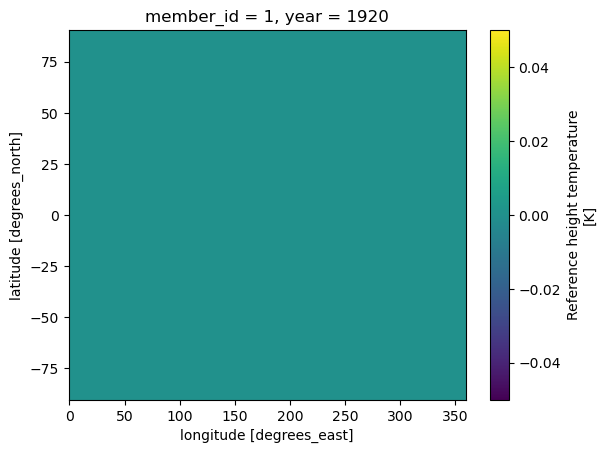

In [27]:
noforcing_all.isel(member_id=0).isel(year=0).plot()

In [28]:
# annual mean in Vancouver for the first ensemble member 

# annualmean.isel(member_id=1).sel(lat=49,lon=237,method='nearest').plot()

# Commented out to save time when running because I don't think I need it right now

In [29]:
BC_mean=ensemblemean.sel(lat=slice(49, 59),lon=slice(235, 245))

BC_mean

<xarray.DataArray 'TREFHT' (year: 86, lat: 11, lon: 9)>
dask.array<getitem, shape=(86, 11, 9), dtype=float32, chunksize=(1, 11, 9), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 49.48 50.42 51.36 52.3 ... 56.07 57.02 57.96 58.9
  * lon      (lon) float64 235.0 236.2 237.5 238.8 240.0 241.2 242.5 243.8 245.0
  * year     (year) int64 1920 1921 1922 1923 1924 ... 2001 2002 2003 2004 2005

In [30]:
#  Take the cosine of latitude (first converting to radians)
coslat = np.cos(np.deg2rad(BC_mean.lat))
print(coslat)

<xarray.DataArray 'lat' (lat: 11)>
array([0.64976067, 0.63717046, 0.62440793, 0.61147643, 0.59837949,
       0.58512073, 0.57170362, 0.55813185, 0.54440913, 0.53053908,
       0.5165255 ])
Coordinates:
  * lat      (lat) float64 49.48 50.42 51.36 52.3 ... 56.07 57.02 57.96 58.9
Attributes:
    axis:           Y
    bounds:         lat_bnds
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north


In [31]:
#  And divide by its mean value
weight_factor = coslat / coslat.mean(dim='lat') 
#  Want to see what we just created?
print(weight_factor)

<xarray.DataArray 'lat' (lat: 11)>
array([1.11197642, 1.09043001, 1.06858869, 1.04645819, 1.02404458,
       1.00135403, 0.97839248, 0.95516624, 0.93168169, 0.907945  ,
       0.88396267])
Coordinates:
  * lat      (lat) float64 49.48 50.42 51.36 52.3 ... 56.07 57.02 57.96 58.9


In [32]:
BC_mean_weighted=(BC_mean*weight_factor).mean(dim=('lon', 'lat'))

In [33]:
# BC_mean_weighted.plot()

In [34]:
# # grouping TREFHT data by season

# grouped = ds.TREFHT.isel(member_id=0).groupby('time.season')
# print(grouped)

# for season,data in grouped:
#     if season == 'DJF':
#         print(data)
#         groupannual = data.groupby('time.year')


# Don't plan on grouping by season but could be useful for later

In [35]:
# Using re-analysis data 

# ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/air.2m.mon.ltm.nc"
# ncep_air2m = xr.open_dataset(ncep_url)

# print(ncep_air2m)


ncep_url_2 = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/surface_gauss/air.2m.mon.mean.nc"
ncep_air2m_2 = xr.open_dataset(ncep_url_2)

print(ncep_air2m_2)

# which data set do I use?
# do I need to include use_cftime=True or decode_times=False like in some of the labs?


<xarray.Dataset>
Dimensions:  (lon: 192, time: 902, lat: 94)
Coordinates:
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-02-01
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     COARDS
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    NCO:                             20121012
    history:                         created 97/10/04 by Hoop (netCDF2.3)\nCo...
    title:                           monthly mean air.2m from the NCEP Reanal...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    _NCProperties:                   version=2,netcdf=4.6.2,hdf5=1.8.20
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  ti

In [36]:
print(ncep_air2m_2.air)

<xarray.DataArray 'air' (time: 902, lat: 94, lon: 192)>
[16279296 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-02-01
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
Attributes: (12/13)
    long_name:     Monthly Mean of Air Temperature
    valid_range:   [150. 400.]
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    ...            ...
    level_desc:    2 m
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [187.4545  314.80725]
    _ChunkSizes:   [  1  94 192]


In [50]:
annualmean_observed = ncep_air2m_2.air.groupby('time.year').mean(dim='time')

print(annualmean_observed)

<xarray.DataArray 'air' (year: 76, lat: 94, lon: 192)>
array([[[253.58492, 253.57434, 253.55919, ..., 253.63293, 253.61739,
         253.60051],
        [253.73035, 253.78307, 253.83235, ..., 253.58919, 253.63866,
         253.68597],
        [254.58473, 254.78477, 254.97404, ..., 253.97314, 254.18156,
         254.38667],
        ...,
        [224.84059, 224.8596 , 224.99492, ..., 225.56506, 225.2072 ,
         224.96422],
        [224.346  , 224.13635, 223.96922, ..., 225.17293, 224.86475,
         224.5898 ],
        [224.29793, 224.1502 , 224.00183, ..., 224.72742, 224.5843 ,
         224.44537]],

       [[254.56343, 254.5518 , 254.54138, ..., 254.61897, 254.6025 ,
         254.58382],
        [254.81755, 254.83882, 254.86066, ..., 254.76532, 254.7808 ,
         254.79897],
        [255.65105, 255.81433, 255.96935, ..., 255.15924, 255.3257 ,
         255.48885],
...
        [228.65747, 228.75563, 228.90533, ..., 228.94978, 228.76723,
         228.67004],
        [228.62852, 228.49

In [38]:
std = noforcing_all.std(dim='member_id')

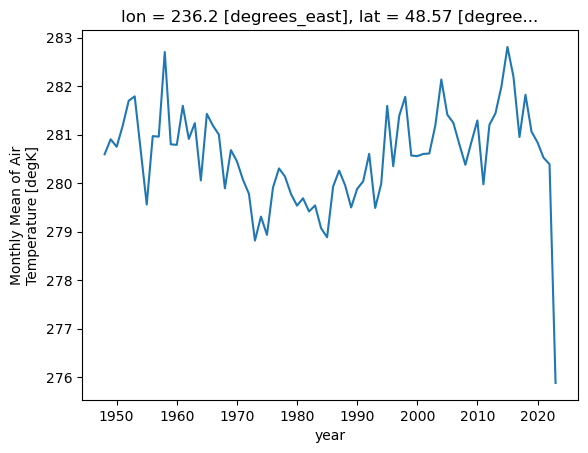

In [51]:
annualmean_observed.sel(lat=49,lon=237,method='nearest').plot()
# plt.fill_between(annualmean_observed.year, -std, std)
# plt.show()

In [53]:
observed_naturalvariability = annualmean_observed - annualmean_observed.mean(dim="year")

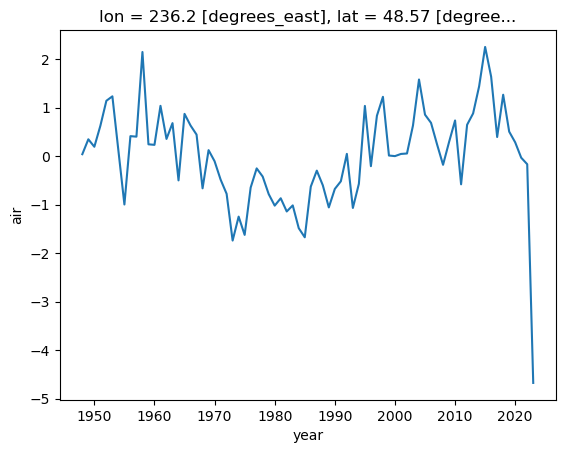

In [54]:
observed_naturalvariability.sel(lat=49,lon=237,method='nearest').plot()

In [ ]:
# Weighting for observed data if I want to look at BC instead of just Vancouver

# coslat2 = np.cos(np.deg2rad(ncep_air2m_2.lat))
# weight_factor2 = coslat / coslat.mean(dim='lat') 

# air_globalavgtemp = (ncep_air2m_2.air * weight_factor).mean(dim=('lon','lat'))

# air_globalavgtemp